<div class="usecase-title">Litter Traps & Public BBQ - Examine Distribution of Urban Amenities and Litter Traps</div>

<div class="usecase-authors"><b>Authored by: </b> Tharusha Cao, Thomas Warren  </div>

<div class="usecase-duration"><b>Duration:</b> 240 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

# Executive Summary 

The City of Melbourne's urban planning initiative seeks to optimize the distribution and maintenance of litter traps in response to the evolving landscape of cafes and public amenities such as BBQ areas. Our analysis focused on spatial relationships, network robustness, and the correlation between litter traps and commercial areas, aiming to enhance the efficiency of waste management practices.

__Key Findings__

*Network Distribution and Robustness*

* The network analysis of litter traps reveals a well-distributed system across the city, with critical nodes identified within the Central Business District (CBD) and along the riverside. These critical nodes are essential for maintaining effective coverage, as their removal would extend the distance between traps beyond the 700m threshold in densely populated areas.

* Inspection frequencies are consistent across the network, with most traps inspected quarterly, irrespective of their critical status. This uniform approach to inspection schedules may not be optimal for all areas, especially those identified as critical nodes.

* Additional data collection on the outcomes of litter trap inspections would allow further analysis in order to better understand the relationship between inspection frequency and maintenance needs, which could lead to more tailored and cost-effective service scheduling. This would allow a cost-benefit analysis of implementing an reviewed schedule with higher priority for traps in high pedestrian areas. 

*Density of Traps*

A significant correlation exists between the density of litter traps and cafes, particularly in areas with high urban activity. This correlation is stronger with cafes than with BBQ areas, suggesting that the presence of food and beverage establishments is a more substantial contributor to litter. This indicates the traps are appropriately distributed for denser activity areas.

# Use Case Report

### Scenario ###

City of Melbourne's Open datasets include include the geographic locations of cafes, public BBQ areas, and litter traps within the municipality. The analysis of such datasets is not just an academic exercise; it has practical implications for urban planning, environmental sustainability, and enhancing the quality of urban life.

### Project Goal ###

In our urban spaces, the distribution and interplay of amenities like cafes, public BBQ areas, and environmental facilities such as litter traps are key drivers of a city's impact on its environment. Given these datasets are separated and City of Melbourne (CoM) standards are not publically available, we hypothesis that these issues are silos in development application considerations. 

Our goal is to conduct a comprehensive proximity analysis to understand how these entities coexist and influence each other. We aim to examine changes in behaviour over time, with a specific focus on cafes, as our dataset includes temporal data for these establishments, unlike the static data for litter traps and BBQ areas. 

### Learning Opporutinities ###

*Data Analysis and Visualization Skills*:

* Develop proficiency in data analysis techniques such as clustering, time series analysis, and geospatial analysis.
* Learn to visualize complex data in a way that is accessible and informative, using tools like GIS software, Python libraries (e.g., Matplotlib, Seaborn), and data visualization platforms.

*Urban Landscape Impact Assessment*:

 * Understand the implications of urban amenities.
 * Learn how litter traps can be used to mitigate pollution and the importance of strategic placement in urban settings.

*Machine Learning Applications*:

 * Apply machine learning techniques for analysis.
 * Learn about practical applications of machine learning in urban studies.

### Outcomes ###

The primary outcome of this analysis is to gain a comprehensive understanding of the interplay between the urban elements of cafes, BBQ areas, and litter traps within the City of Melbourne. By leveraging various analytical techniques, we anticipate uncovering actionable insights that can drive strategic urban planning and environmental management decisions.


### Techniques To Be Used ###

*Proximity Analysis*:

This technique will help us understand the spatial relationships between cafes, BBQ areas, and litter traps. By calculating distances and examining the geographical closeness of these features, we can assess how they might influence each other. For instance, we can explore if cafes are commonly located near public BBQ areas or if litter traps are strategically placed around these social hubs.

*Network Analysis*

Utilizing graph theory, network analysis will enable us to visualize and quantify the interconnections between litter traps within the urban landscape. By representing litter traps as nodes and their relationships as edges  based on proximity we can identify central nodes that are crucial for the efficiency and resilience of the entire network. This analysis can reveal clusters of traps, potentially indicating areas of high activity, and it can help in identifying the most interconnected and therefore critical traps that, if compromised, could impact the wider network.

*Robustness Analysis*

The robustness of the litter trap network will be examined to understand how resilient the system is to disruptions, such as the failure of certain traps. This will help identify critical nodes whose failure would lead to significant increases in litter or reduce the effectiveness of the remaining network. The analysis will also provide insights into the redundancy of the network and inform strategies to enhance its robustness against potential urban changes or budget constraints.

*Clustering Analysis*

This technique involves applying clustering algorithms to group litter traps, cafes, and BBQ areas based on their locations and other relevant features. Through clustering analysis, we aim to discover patterns and categorize these urban features into meaningful clusters that share similar characteristics.

*Correlation Analysis*:

This will allow us to observe correlations within the dataset, such as the relationship between the density of cafes and the frequency of litter traps. By examining these correlations, we can infer potential causal relationships or dependencies. For example, a high correlation between the number of cafes and the density of litter traps might suggest that more dining options lead to an increased need for litter management.


# Code

Note the "Discussion" sections are displayed under relevant code outputs.

In [19]:
###################################################################
# Libraries used:
###################################################################
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import requests
import math
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 975.2 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.6 MB 4.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.4/1.6 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.5 MB/s eta 0:00:00


In [3]:
### Import datasets

# Manually reading each CSV file from website
linkLitterTraps = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/litter-traps/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
linkPublicBBQ ="https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/public-barbecues/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
linklinkCafeRes = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/cafes-and-restaurants-with-seating-capacity/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
litter_df = pd.read_csv(linkLitterTraps)
bbq_df = pd.read_csv(linkPublicBBQ)
cafe_df = pd.read_csv(linklinkCafeRes)

## Data Preprocessing

In [4]:
# Handle NaN values in the datasets
litter_df.dropna(subset=['lat', 'lon'], inplace=True)
bbq_df.dropna(subset=['Co-ordinates'], inplace=True)
cafe_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [5]:
# Drop redundant columns
litter_df.drop(columns=['maintained_by'])

,asset_number,asset_description,construct_material_lupvalue,inspection_frequency,object_type_lupvalue,lat,lon,location
0,1126515,SWD Litter Trap - Queensbridge St,Concrete,Half Yearly,Trash Rack,-37.820749,144.962333,"-37.82074917518231, 144.96233287185117"
1,1379350,"SWD Litter Trap - West side Wurundjeri Way, ne...",NaN,Quarterly,Offset Centrifugal GPT,-37.812671,144.945636,"-37.812671357856935, 144.94563578253997"
2,1516483,SWD Litter Trap - Boyd Community Hub (SOUTHBANK),NaN,NaN,Not Known,-37.825490,144.961208,"-37.825490336480286, 144.9612080150195"
3,1126533,SWD Litter Trap - Cumberland St,Concrete,Quarterly,Offset Centrifugal GPT,-37.819900,144.942754,"-37.81990017409475, 144.94275387398454"
4,1432451,"SWD-Litter Trap-East Harbour Esp, cnr La Trobe...",Concrete,Quarterly,Offset Centrifugal GPT,-37.815349,144.945348,"-37.81534931155489, 144.94534809647914"
...,...,...,...,...,...,...,...,...
58,1126529,SWD Litter Trap-South east side Bourke St at H...,Concrete,Quarterly,Offset Centrifugal GPT,-37.818920,144.947170,"-37.81891982191636, 144.9471703182558"
59,1378102,SWD Litter Trap - MP13B - Bayles St,Precast Concrete,Quarterly,Offset Centrifugal GPT,-37.793851,144.955434,"-37.79385095713805, 144.9554336599639"
60,1126528,"SWD Litter Trap - Galada Ave, west pipe",Precast Concrete,Quarterly,Offset Centrifugal GPT,-37.781642,144.940922,"-37.7816423151755, 144.9409221603282"
61,1126507,SWD Litter Trap - Cardigan St,Precast Concrete,Quarterly,In Line GPT,-37.806129,144.964626,"-37.806129321325805, 144.96462630105236"


## Functions


In [6]:
# Function to calculate the minimum distance from a point to any point in a list
"""
Calculate the minimum geodesic distance from a point to any point in a given list.

Parameters:
point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.

Returns:
float: The minimum Euclidean distance from the given point to the closest point in the list.
"""

def min_distance(point, list_of_points):
    return min([geodesic(point, pt).meters for pt in list_of_points]) #get min dis

# Extract coordinates as tuples (latitude, longitude)
litter_coords = list(zip(litter_df['lat'], litter_df['lon'])) 
bbq_coords = [(float(c.split(',')[0]), float(c.split(',')[1])) for c in bbq_df['Co-ordinates']]
cafe_coords = list(zip(cafe_df['Latitude'], cafe_df['Longitude']))


In [7]:
#Calculate the Number of BBQ area and cafe in the radius of 200m
"""
Calculate the number of geodesic distances from a point to any point in a given list.

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters

Returns:
INT: The Number of points in the radius given
"""

def count_points_in_radius(center_point, list_of_points, radius_meters):
    count = sum(1 for pt in list_of_points if geodesic(center_point, pt).meters <= radius_meters)
    return count


In [8]:
#Calculate the Nearby points of BBQ area and cafe in the radius of 200m
"""
Calculate the points of geodesic distances from a point to any point in a given list .

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters

Returns:
INT: The geo location in list 
"""

def get_points_in_radius(center_point, list_of_points, radius_meters):
    nearby_points = [pt for pt in list_of_points if geodesic(center_point, pt).meters <= radius_meters]
    return nearby_points

In [9]:
# Set radius for analysis
radius = 200

In [10]:
# Calculate the nearest BBQ area and cafe for each litter trap
litter_df['Nearest BBQ Distance (m)'] = litter_df.apply(lambda row: min_distance((row['lat'], row['lon']), bbq_coords), axis=1)
litter_df['Nearest Cafe Distance (m)'] = litter_df.apply(lambda row: min_distance((row['lat'], row['lon']), cafe_coords), axis=1)\
# Calculate number of points for each littertrap
litter_df['Number of Nearby Points in 200m Radius'] = litter_df.apply(lambda row: count_points_in_radius((row['lat'], row['lon']), bbq_coords + cafe_coords,radius),axis=1)

In [11]:
# List the Points for each litter trap
litter_df['Nearby Points in 200m Radius'] = litter_df.apply(
    lambda row: get_points_in_radius((row['lat'], row['lon']), bbq_coords + cafe_coords,radius),
    axis=1
)

In [12]:
# Export to CSV
litter_df.to_csv('LitterAna.csv', sep=',', index=False, encoding='utf-8')

# Read CSV
LitterAna = pd.read_csv('LitterAna.csv')


In [13]:
#Calculate the Nearby points of BBQ area and cafe in the radius of 200m
"""
Calculate the points of geodesic distances from a point to any point in a given list .

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters

Returns:
INT: The geo location in list 
"""

def get_points_in_radius(center_point, list_of_points, radius_meters):
    nearby_points = [pt for pt in list_of_points if geodesic(center_point, pt).meters <= radius_meters]
    return nearby_points

In [14]:
#Calculate the Nearby points of BBQ area and cafe in the radius of 200m
"""
Calculate the points of geodesic distances from a point to any point in a given list .

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters

Returns:
INT: The geo location in list 
"""

def get_points_in_radius(center_point, list_of_points, radius_meters):
    nearby_points = [pt for pt in list_of_points if geodesic(center_point, pt).meters <= radius_meters]
    return nearby_points

## Density Mapping

This visualization techinque uses folium to represent the littertraps on the map and also represent the nearby restraunts.


In [15]:


# Function to determine the color based on the number of nearby points
def get_color(num_nearby_points):
    if num_nearby_points > 300:
        return 'red'  # High number of nearby points
    elif num_nearby_points > 100:
        return 'yellow'  # Medium number of nearby points
    else:
        return 'green'  # Low number of nearby points

# Create a folium map centered at the mean coordinates of litter traps
map_center = [LitterAna['lat'].mean(), LitterAna['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# Create MarkerClusters for traps and nearby points
marker_cluster_traps = MarkerCluster(maxClusterRadius=200).add_to(mymap)  # Cluster the litter traps to groups
marker_cluster_nearby = MarkerCluster(maxClusterRadius=50).add_to(mymap)

# Create a legend
legend_html = """
<div style="position: fixed; 
             top: 10px; right: 10px; width: 300px; height: 100px; 
             background-color: white; border:2px solid grey; z-index:9999; font-size:12px;
             ">&nbsp; Legend <br>
             &nbsp; High Nearby Cafe,Restaurnts,BBQ: <i class="fa fa-circle fa-1x" style="color:red"></i><br>
             &nbsp; Medium Nearby Cafe,Restaurnts,BBQ: <i class="fa fa-circle fa-1x" style="color:yellow"></i><br>
             &nbsp; Low Nearby Cafe,Restaurnts,BBQ: <i class="fa fa-circle fa-1x" style="color:green"></i>
</div>
"""

mymap.get_root().html.add_child(folium.Element(legend_html))

# Add circles for litter trap points.
for index, row in LitterAna.iterrows():
    trap_location = [row['lat'], row['lon']]
    num_nearby_points = row['Number of Nearby Points in 200m Radius']

    # Determine the color based on the number of nearby points
    trap_color = get_color(num_nearby_points)

    # Add a circle for the 200m radius around the litter trap
    folium.Circle(
        location=trap_location,
        radius=200,  # 200 meters radius
        color='gray',
        fill=False,
        fill_opacity=0.2
    ).add_to(mymap)

    # Add a circle for the litter trap with color based on nearby points
    folium.CircleMarker(
        location=trap_location,
        radius=30,  # Size based on the number of litters trapped
        popup=f"Litter Trap: {row['asset_number']}\nNearby Points: {num_nearby_points}",  # Things to show
        #color='red',  # Default color for clustering
        fill=True,
        fill_opacity=1,
        fill_color=trap_color  # Set fill color based on nearby points
    ).add_to(marker_cluster_traps)

    # Display nearby points on the map
    nearby_points = row['Nearby Points in 200m Radius']
    if isinstance(nearby_points, list):
        for point in nearby_points:
            if isinstance(point, tuple) and len(point) == 2:
                lat, lon = point
                # Add a green marker for the nearby point
                folium.Marker(
                    location=(lat, lon),
                    popup="Nearby Point",
                    icon=folium.Icon(color='green')
                ).add_to(marker_cluster_nearby)

# Display the map
mymap

In [16]:
marker_cluster_nearby

In [17]:
LitterAna['inspection_frequency'].value_counts()

inspection_frequency
Quarterly      51
Half Yearly     5
Not Known       1
Other           1
Name: count, dtype: int64

## Network Analysis

The below determines the 'network' of litter traps based on proximity. A distance of 700m is assumed to be within the same network. This allows to inspect visual clustering, and determine which nodes are critical.

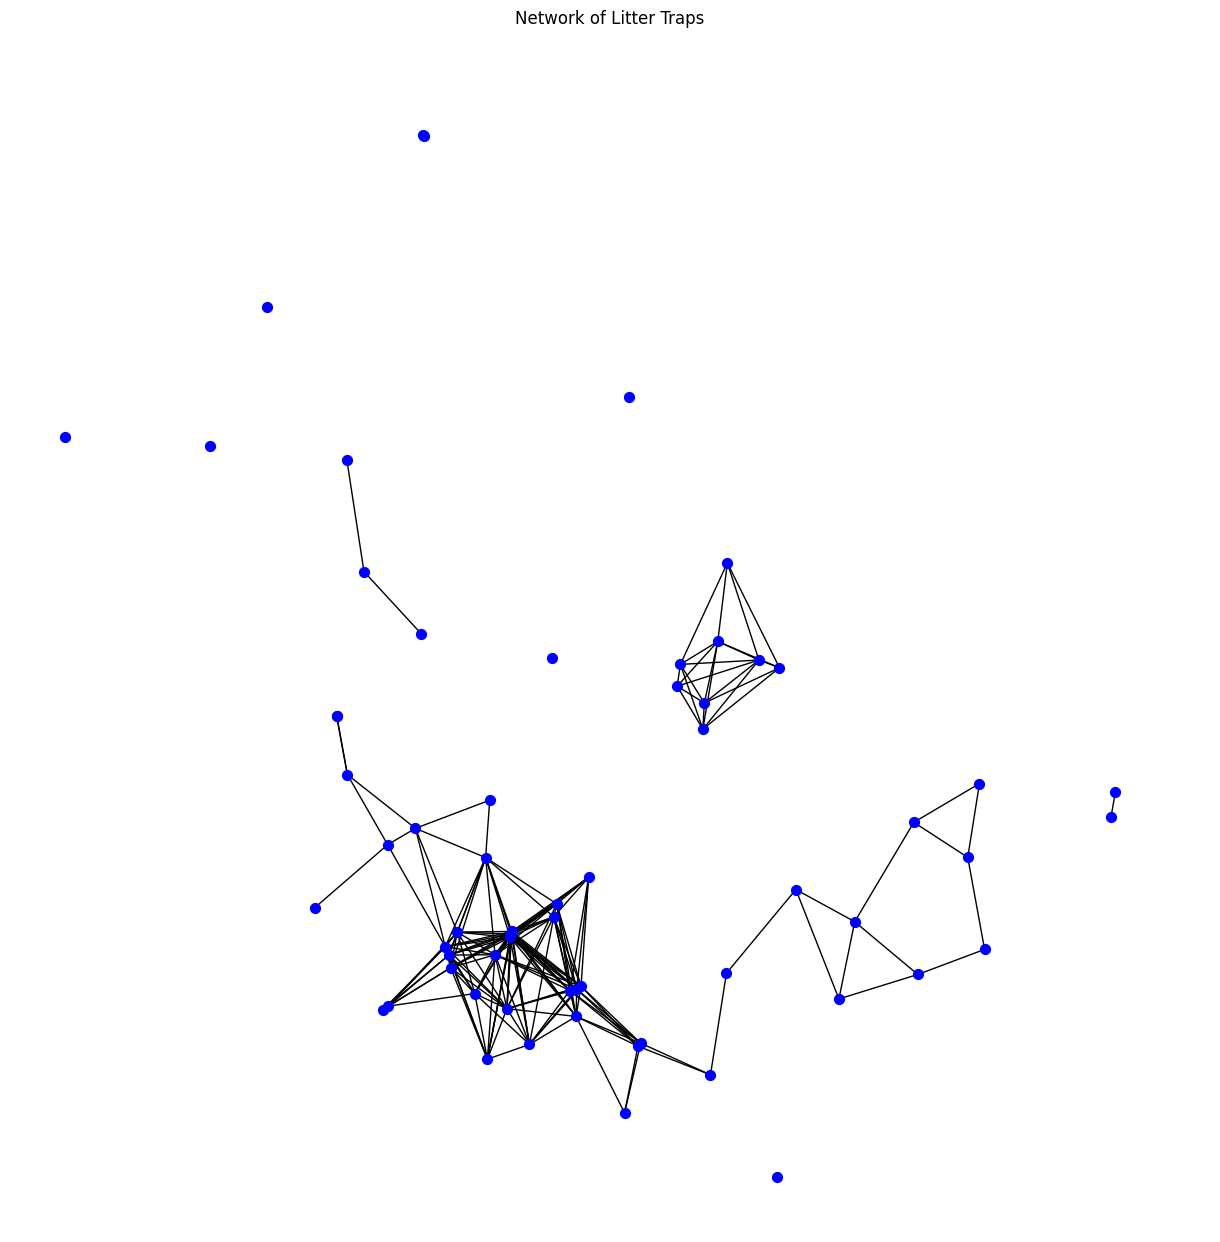

Critical nodes whose removal would impact connectivity: {1126515: 9, 1379350: 1, 1516483: 10, 1126533: 1, 1432451: 1, 1126534: 1, 1426524: 1, 1126535: 1, 1379346: 1, 1426531: 1, 1378098: 1, 1378312: 1, 1390880: 1, 1721536: 1, 1126525: 1, 1126532: 1, 1746011: 1, 1126530: 1, 1126516: 1, 1426534: 1, 1378299: 1, 1126520: 1, 1426532: 1, 1378310: 1, 1126512: 1, 1379349: 1, 1378311: 1, 1721602: 1, 1378105: 3, 1745807: 2, 1442285: 1, 1126522: 8, 1379347: 1, 1378135: 1, 1378132: 1, 1126519: 1, 1378104: 1, 1126524: 1, 1126531: 1, 1379345: 1, 1126529: 1, 1126513: 1}


In [20]:
import networkx as nx

# Set the threshold distance for creating edges
threshold_distance = 700  # meters

# Create an empty graph
G = nx.Graph()

# Add nodes
for index, row in LitterAna.iterrows():
    G.add_node(row['asset_number'], pos=(row['lon'], row['lat']))

# Add edges based on the threshold distance
for node1 in G.nodes(data=True):
    for node2 in G.nodes(data=True):
        if node1 != node2:
            # Calculate the distance between the two nodes (using haversine or another appropriate formula if required)
            dist = ((node1[1]['pos'][0] - node2[1]['pos'][0]) ** 2 + (node1[1]['pos'][1] - node2[1]['pos'][1]) ** 2) ** 0.5
            # Convert degrees to meters (approximation)
            dist *= 111.32 * 1000
            if dist < threshold_distance:
                G.add_edge(node1[0], node2[0], weight=dist)

# Visualization of the network
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=50, node_color='blue', with_labels=False)
plt.title('Network of Litter Traps')
plt.show()

# Robustness Analysis
# Remove a node and see how it affects the network's largest connected component
largest_cc = max(nx.connected_components(G), key=len)
original_size = len(largest_cc)

# Simulate removing nodes
removal_effects = {}
for node in list(G.nodes):
    H = G.copy()
    H.remove_node(node)
    largest_cc = max(nx.connected_components(H), key=len)
    new_size = len(largest_cc)
    removal_effects[node] = original_size - new_size

# Identify critical nodes
critical_nodes = {k: v for k, v in removal_effects.items() if v > 0}

print("Critical nodes whose removal would impact connectivity:", critical_nodes)


In [21]:
# Create a DataFrame
# Add a column to the DataFrame to indicate if a node is critical
litter_df['IsCritical'] = litter_df['asset_number'].isin(critical_nodes)

litter_df['IsCritical'].value_counts() 

IsCritical
True     42
False    21
Name: count, dtype: int64

__Map Critical Nodes__

In [22]:
# Create a map centered around the average coordinates
map_center_lon = litter_df['lon'].mean()
map_center_lat = litter_df['lat'].mean()
mymap = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=13)

for index, row in litter_df.iterrows():
# Add points to the map
    color = 'red' if row['IsCritical'] else 'blue'
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        color=color,
        fill=True,
        radius=5,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Asset Number: {row['asset_number']}, IsCritical: {row['IsCritical']}"
    ).add_to(mymap)

# Display the map
mymap

__Check Inspection Frequency on Critical vs. Uncritical Nodes__

<Axes: xlabel='IsCritical'>

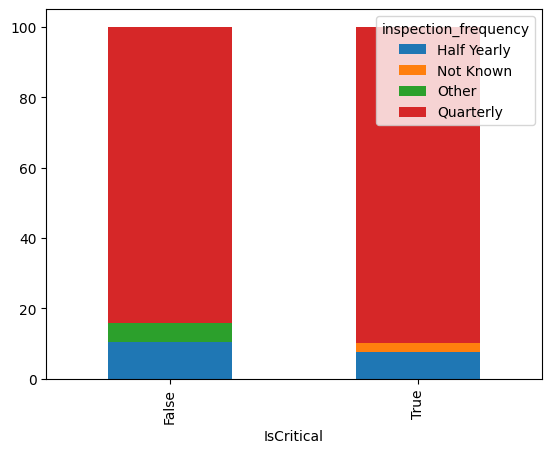

In [23]:
# Create a DataFrame of critical nodes
inspection_frequencies = litter_df.groupby('IsCritical')['inspection_frequency'].value_counts().unstack(fill_value=0)

# Calculate the percentage of each inspection frequency for critical vs. non-critical nodes
inspection_frequencies_percentage = inspection_frequencies.div(inspection_frequencies.sum(axis=1), axis=0) * 100

# Plot the inspection frequencies
inspection_frequencies_percentage.plot.bar(stacked=True)

### Discussion

The above image represents the network of litter traps within the municipality. Several things can be noted:

 * The traps are reasonably well distributed, with notably high density in the CBD and riverside areas. This aligns with appropriate asset allocation based on increased pedestrian, commercial, and leisure activities. 
 * By removing nodes, we can examine which are critical to the network - that is, whether it would mean traps are further than 700m in denser areas.
 * It is found that approximately 42 traps are critical to avoid the above, which are distributed within the CBD and northern riverside.
 * It is determined that the bulk of inspection frequencies are quarterly regardless of whether a node is critical or non-critical. This is the highest documented frequency, with the 2nd highest being semi-annually. 

It is possible that by changing the inspection frequencies units (potentially by creating a monthly inspection schedule) for critical nodes would lead to higher efficiency. The effectiveness of this would be dependent on whether the quarterly inspections create outcomes, such as the trap requiring emptying or other maintenance, or not. This data is not within the dataset, and so the outcome is unknown. An avenue for future investigation would be to update the existing dataset or create a new dataset of maintenance outcomes of inspections.  


## Corelation Heatmap

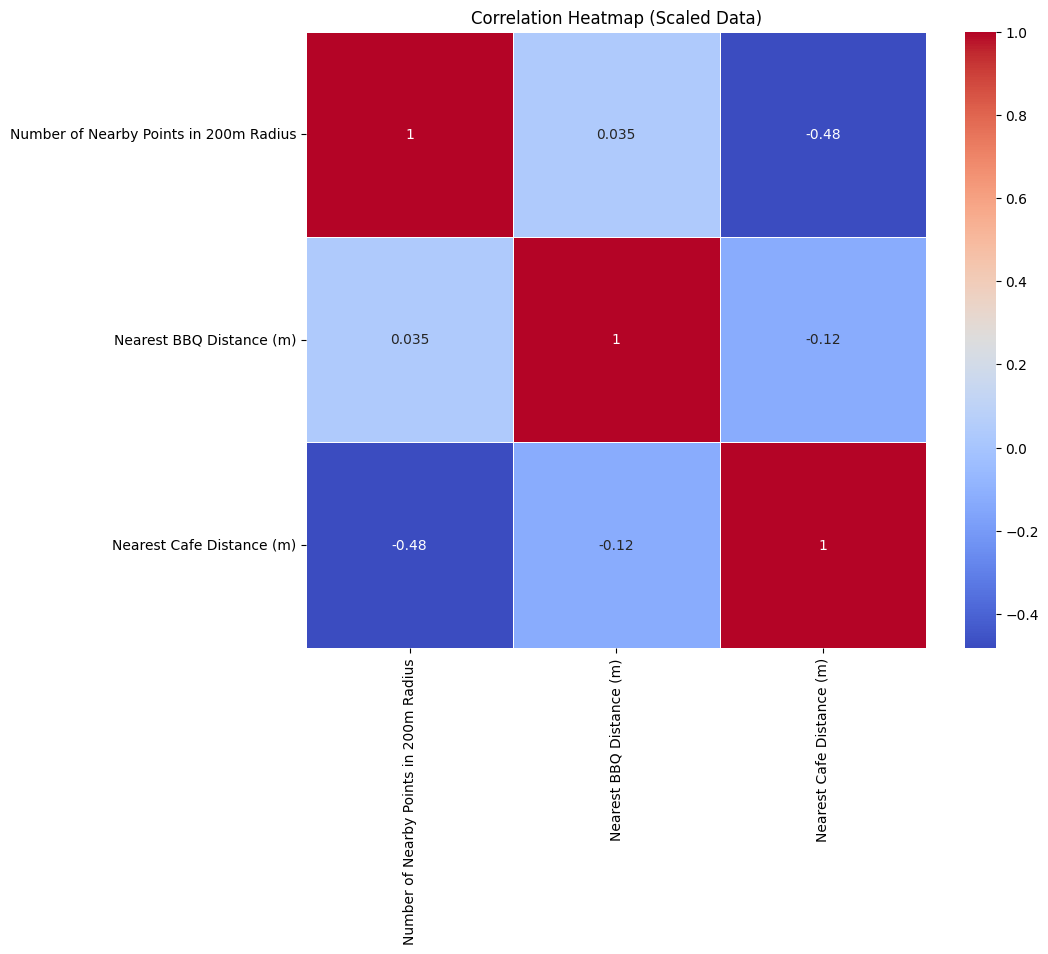

In [24]:
# Select specific columns for correlation analysis
selected_columns = [
    'Number of Nearby Points in 200m Radius',
    'Nearest BBQ Distance (m)',
    'Nearest Cafe Distance (m)'
    ]

# Subset the DataFrame with the selected columns
selected_data = LitterAna[selected_columns]
# Scale the data using StandardScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)


correlation_matrix = scaled_df.corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap (Scaled Data)")
plt.show()


### Discussion

As can be seen, there is a reasonably high correlation to higher density litter traps and cafes, rather than BBQ areas. This is in keeping with the intuitive understanding from the map that litter traps and cafes tended to be in denser areas.  

## Clustering Analysis

This will examine whether any novel clustering occur within the dataset. The density (Number of Nearby Points in 200m Radius), inspection frequency, construction material, and trap type are examined. 

In [25]:
from sklearn.cluster import KMeans

# Select specific columns for clustering
selected_columns = [
    'Number of Nearby Points in 200m Radius',
    'object_type_lupvalue',
    'construct_material_lupvalue',
    'inspection_frequency'
    ]

# Subset the DataFrame with the selected columns
cat_columns = ['object_type_lupvalue', 'construct_material_lupvalue', 'inspection_frequency']
num_columns = ['Number of Nearby Points in 200m Radius']

# Get dummy variables for categorical columns
cluster_data = pd.get_dummies(litter_df[cat_columns])

# Add the numerical column to the DataFrame
cluster_data[num_columns] = litter_df[num_columns]

# Specify the number of clusters you want to create
num_clusters = 3

# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=num_clusters)

# Fit the data to the KMeans model
kmeans.fit(cluster_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the centroids of the clusters
cluster_centers = kmeans.cluster_centers_

# Add cluster labels back to the original DataFrame
litter_df['Cluster'] = cluster_labels

D:\python\envs\CapstoneTeamProject\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


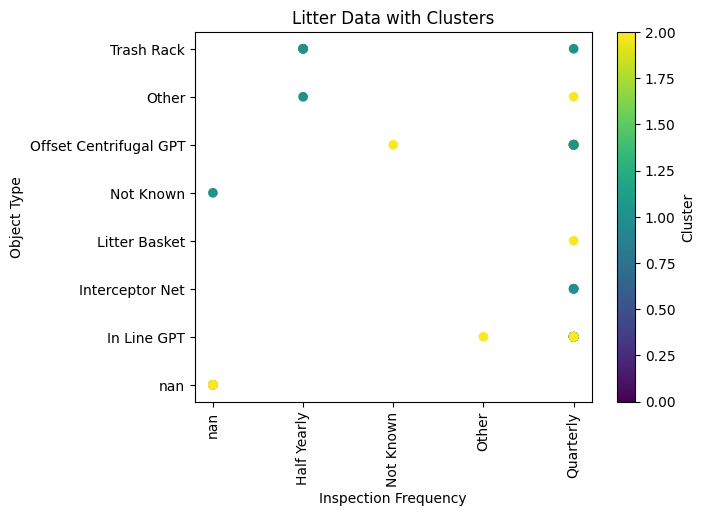

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the inspection frequency and object type
litter_df['inspection_frequency_code'] = litter_df['inspection_frequency'].astype('category').cat.codes
litter_df['object_type_code'] = litter_df['object_type_lupvalue'].astype('category').cat.codes

# Scatter plot using the numeric encodings
plt.scatter(litter_df['inspection_frequency_code'], litter_df['object_type_code'], c=litter_df['Cluster'])

# Add labels and title
plt.xticks(litter_df['inspection_frequency_code'].unique(), litter_df['inspection_frequency'].unique(), rotation='vertical')
plt.yticks(litter_df['object_type_code'].unique(), litter_df['object_type_lupvalue'].unique(), rotation='horizontal')
plt.xlabel('Inspection Frequency')
plt.ylabel('Object Type')
plt.title('Litter Data with Clusters')

# Add a colorbar
plt.colorbar(label='Cluster')

plt.show()


### Discussion

The clustering graph does not exhibit any discernible pattern. The data points appear to be scattered randomly without any clear grouping or clustering. This suggests that there is no inherent structure or relationship among the data points. Further analysis and exploration may be required to uncover any underlying patterns or insights.


__Count Critical versus Uncritical Nodes__

## Linear Analysis (preliminary) - proof of concept

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['Number of Nearby Points in 200m Radius']
target = 'asset_number'
X = LitterAna[features]
y = LitterAna[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#NOT GOOD -  R² of -0.1605 suggests that the model does not perform well
        

Mean Squared Error: 34252754697.803337
R-squared: 0.16059394490802192


In [34]:
# Create a DataFrame with new data
new_data = pd.DataFrame({
    'Number of Nearby Points in 200m Radius': [input("Enter number of points surrounding trap : ")]
})

# Make predictions
predictions = model.predict(new_data)

# Print or use the predictions as needed
print("Predicted number of assets for nearby points in radius : ",predictions)


Enter number of points surrounding trap : 100
Predicted number of assets for nearby points in radius :  [1320738.66386587]
